In [28]:
import pytif 
import os
import pandas as pd
import importlib
import numpy as np
import cv2
importlib.reload(pytif)
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Reading the tiff file

In [2]:
%%time
filename = "nakskov_rural"
file_path = f"{filename}.tif"
raster = pytif.Trim_Raster(file_path)
img_array = raster.src_array

Image size: (4500, 5500)
Bounds: 634666.0 6075781.2 636866.0 6077581.2
Resolution: 0.4 0.4
EPSG:25832
Wall time: 306 ms


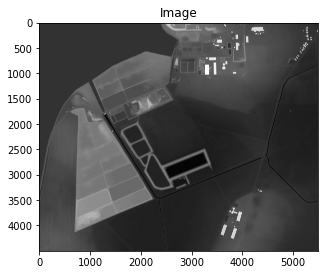

In [3]:
raster.display_image(img_array)

## Edge Detection using opencv

[More info on canny edge detection](https://docs.opencv.org/4.x/da/d22/tutorial_py_canny.html)

In [29]:
%%time
df = pytif.extract_edges(img_array, raster.src)
print(f"Elevation ranging from {df['z'].min()} m, MSL to {df['z'].max()} m, MSL")
print(f"Percentage of points taken: {(df['z'].shape[0]/img_array.flatten().shape[0]*100):.2f} % of the total number of pixels")
print(f"i.e; {df.shape[0]} number of pixels")

df.to_csv(f"{filename}.csv", index=False)
df

Elevation ranging from -3.7451171875 m, MSL to 15.4443359375 m, MSL
Percentage of points taken: 1.22 % of the total number of pixels
i.e; 301538 number of pixels
Wall time: 6.1 s


,x,y,z,long,lat
0,0,2389,1.806641,635621.6,6.077581e+06
1,0,2393,2.565430,635623.2,6.077581e+06
2,0,2457,5.136719,635648.8,6.077581e+06
3,0,2461,5.691406,635650.4,6.077581e+06
4,0,2472,7.656250,635654.8,6.077581e+06
...,...,...,...,...,...
301533,4499,2510,-1.725586,635670.0,6.075782e+06
301534,4499,3805,2.553711,636188.0,6.075782e+06
301535,4499,3934,2.549805,636239.6,6.075782e+06
301536,4499,3943,2.541016,636243.2,6.075782e+06
